In [7]:
pip install pandas scikit-learn matplotlib seaborn   

Note: you may need to restart the kernel to use updated packages.


Train Accuracy: 1.00
Test Accuracy: 0.92


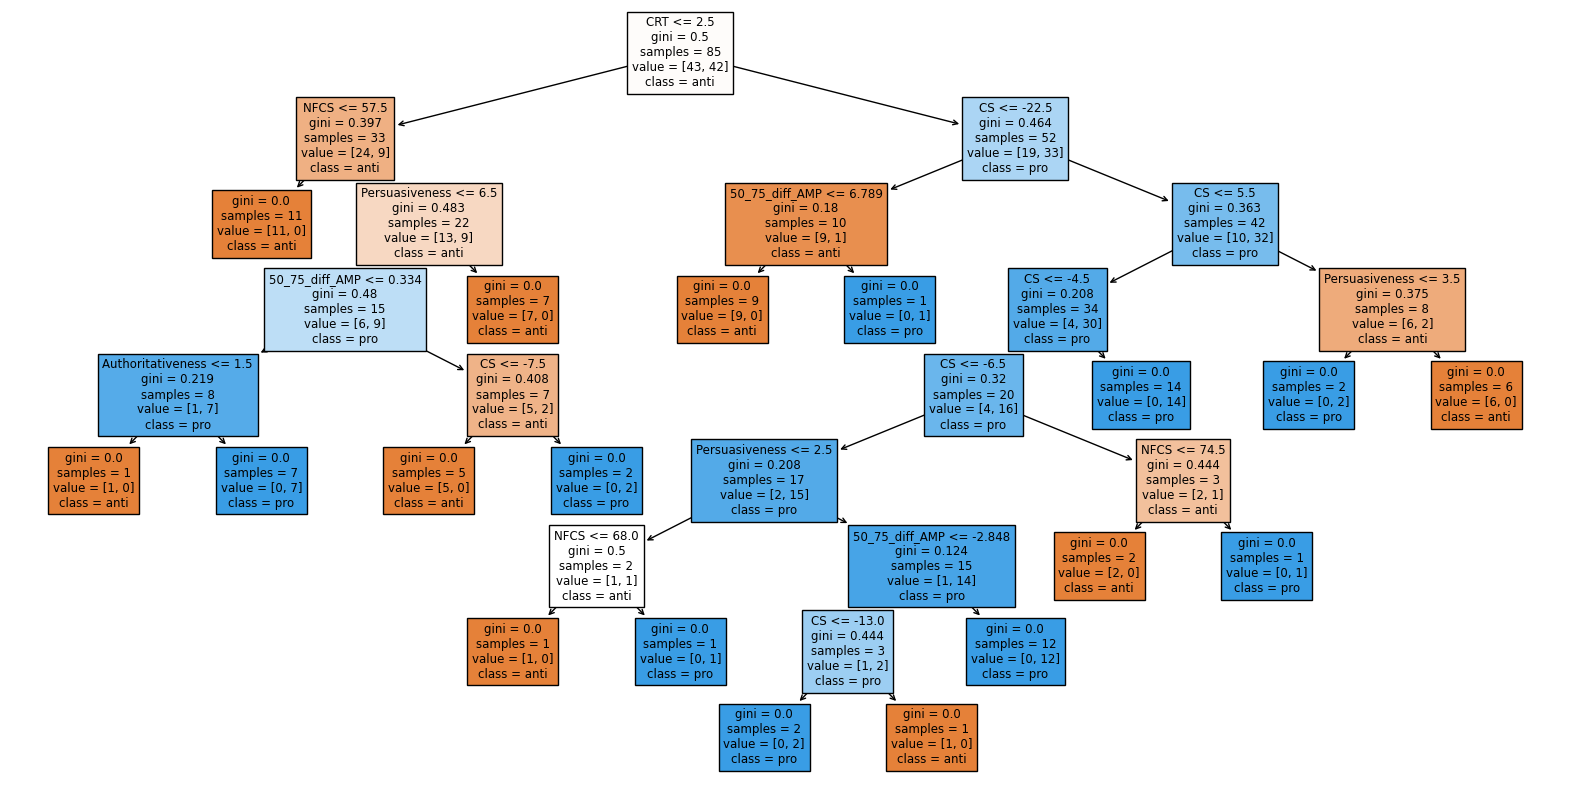

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz

# Загрузка данных
data = pd.read_csv('EEG_001.csv')

# Замена запятых на точки в переменной 50_75_diff_AMP
data['50_75_diff_AMP'] = data['50_75_diff_AMP'].str.replace(',', '.').astype(float)

# Определяем признаки и целевую переменную
features = ['CRT', 'NFCS', 'CS', 'Persuasiveness', 
            'Sharing', 'Congruence', 'Authoritativeness', 'Trust', '50_75_diff_AMP']
target = 'Attitude'

# Преобразование категориальных данных в числовые
data = pd.get_dummies(data, columns=['Speaker'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.3, random_state=42)

# Создание и обучение модели дерева решений
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Оценка точности модели
train_accuracy = tree_clf.score(X_train, y_train)
test_accuracy = tree_clf.score(X_test, y_test)
print(f'Train Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Визуализация дерева решений
plt.figure(figsize=(20,10))
plot_tree(tree_clf, feature_names=X_train.columns, class_names=tree_clf.classes_, filled=True)
plt.show()

# Альтернативная визуализация с использованием graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X_train.columns,
                           class_names=tree_clf.classes_,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

# Интерпретация результатов:
# - Train Accuracy и Test Accuracy показывают, насколько хорошо модель обучилась на обучающих данных и насколько она обобщает на тестовых данных.
# - Визуализация дерева позволяет понять, какие признаки наиболее важны для принятия решений и как они разделяют данные.

In [27]:
import pandas as pd
from scipy.stats import shapiro
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Загрузка данных из файла CSV
data = pd.read_csv('clean_eeg.csv')

# Замена запятых на точки в указанных переменных
variables = [
   '60_65_PROCENKO_AMP_E', '60_65_PROCENKO_AMP_C', '60_65_QUKQINA_AMP_E', '60_65_QUKQINA_AMP_C', '50_75_PROCENKO_AMP_E', '50_75_PROCENKO_AMP_C', '50_75_QUKQINA_AMP_E', '50_75_QUKQINA_AMP_C'
]

# Замена запятых на точки в данных
for var in variables:
    data[var] = data[var].astype(str).str.replace(',', '.').astype(float)

# Создание DataFrame для сохранения результатов
results = []

# Функция для проверки нормальности распределения
def check_normality(group_data, variable, group_name):
    stat, p_value = shapiro(group_data)
    is_normal = p_value > 0.05
    results.append({
        'Variable': variable,
        'Group': group_name,
        'Statistic': stat,
        'p-value': p_value,
        'Normal Distribution': is_normal
    })

# Разделение данных по группам anti и pro
anti_group = data[data['Attitude'] == 'anti']
pro_group = data[data['Attitude'] == 'pro']

# Проверка нормальности для каждой переменной в каждой группе
for variable in variables:
    check_normality(anti_group[variable], variable, 'anti')
    check_normality(pro_group[variable], variable, 'pro')

# Создание DataFrame из результатов
results_df = pd.DataFrame(results)

# Сохранение результатов в Excel-файл
results_df.to_excel('normality_results_Q.xlsx', index=False)

# Открытие Excel-файла для форматирования
wb = load_workbook('normality_results_Q.xlsx')
ws = wb.active

# Форматирование строк на основе нормальности распределения
for row in range(2, ws.max_row + 1):
    is_normal = ws.cell(row=row, column=5).value
    fill_color = "00FF00" if is_normal else "FF0000"  # Зеленый для нормального, красный для ненормального
    for col in range(1, ws.max_column + 1):
        ws.cell(row=row, column=col).fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type="solid")

# Сохранение отформатированного Excel-файла
wb.save('normality_results_QQQ.xlsx')

In [31]:
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

# Загрузка данных из CSV файла
data = pd.read_csv('clean_eeg.csv')

# Замена запятых на точки в переменных AMP_C_PROC и AMP_E_PROC

data['60_65_PROCENKO_AMP_C'] = data['60_65_PROCENKO_AMP_C'].str.replace(',', '.').astype(float)
data['60_65_PROCENKO_AMP_E'] = data['60_65_PROCENKO_AMP_E'].str.replace(',', '.').astype(float)

data['60_65_QUKQINA_AMP_C'] = data['60_65_QUKQINA_AMP_C'].str.replace(',', '.').astype(float)
data['60_65_QUKQINA_AMP_E'] = data['60_65_QUKQINA_AMP_E'].str.replace(',', '.').astype(float)

data['50_75_PROCENKO_AMP_C'] = data['50_75_PROCENKO_AMP_C'].str.replace(',', '.').astype(float)
data['50_75_PROCENKO_AMP_E'] = data['50_75_PROCENKO_AMP_E'].str.replace(',', '.').astype(float)

data['50_75_QUKQINA_AMP_C'] = data['50_75_QUKQINA_AMP_C'].str.replace(',', '.').astype(float)
data['50_75_QUKQINA_AMP_E'] = data['50_75_QUKQINA_AMP_E'].str.replace(',', '.').astype(float)



print('------------------------------------------  600ms - 750ms')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'pro']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic1, p_value1 = ttest_ind(filtered_data['60_65_PROCENKO_AMP_C'], filtered_data['60_65_PROCENKO_AMP_E'])

# Вывод результатов
print(f"Статистика T: {statistic1}")
print(f"P-значение: {p_value1}")

# Интерпретация результата
alpha = 0.05
if p_value1 < alpha:
    print("Существует статистически значимая разница между 60_65_PROCENKO_AMP_C и 60_65_PROCENKO_AMP_E для группы 'pro'.")
else:
    print("Нет статистически значимой разницы между 60_65_PROCENKO_AMP_C и 60_65_PROCENKO_AMP_E для группы 'pro'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'anti']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic2, p_value2 = ttest_ind(filtered_data['60_65_PROCENKO_AMP_C'], filtered_data['60_65_PROCENKO_AMP_E'])

# Вывод результатов
print(f"Статистика T: {statistic2}")
print(f"P-значение: {p_value2}")

# Интерпретация результата
alpha = 0.05
if p_value2 < alpha:
    print("Существует статистически значимая разница между 60_65_PROCENKO_AMP_C и 60_65_PROCENKO_AMP_E для группы 'anti'.")
else:
    print("Нет статистически значимой разницы между 60_65_PROCENKO_AMP_C и 60_65_PROCENKO_AMP_E для группы 'anti'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'pro']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic3, p_value3 = mannwhitneyu(filtered_data['60_65_QUKQINA_AMP_C'], filtered_data['60_65_QUKQINA_AMP_E'])

# Вывод результатов
print(f"Статистика U: {statistic3}")
print(f"P-значение: {p_value3}")

# Интерпретация результата
alpha = 0.05
if p_value3 < alpha:
    print("Существует статистически значимая разница между 60_65_QUKQINA_AMP_C и 60_65_QUKQINA_AMP_E для группы 'pro'.")
else:
    print("Нет статистически значимой разницы между 60_65_QUKQINA_AMP_C и 60_65_QUKQINA_AMP_E для группы 'pro'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'anti']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic4, p_value4 = ttest_ind(filtered_data['60_65_QUKQINA_AMP_C'], filtered_data['60_65_QUKQINA_AMP_E'])

# Вывод результатов
print(f"Статистика T: {statistic4}")
print(f"P-значение: {p_value4}")

# Интерпретация результата
alpha = 0.05
if p_value4 < alpha:
    print("Существует статистически значимая разница между 60_65_QUKQINA_AMP_C и 60_65_QUKQINA_AMP_E для группы 'anti'.")
else:
    print("Нет статистически значимой разницы между 60_65_QUKQINA_AMP_C и 60_65_QUKQINA_AMP_E для группы 'anti'.")

print('------------------------------------------ 500ms - 750ms')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'pro']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic1, p_value1 = mannwhitneyu(filtered_data['50_75_PROCENKO_AMP_C'], filtered_data['50_75_PROCENKO_AMP_E'])

# Вывод результатов
print(f"Статистика U: {statistic1}")
print(f"P-значение: {p_value1}")

# Интерпретация результата
alpha = 0.05
if p_value1 < alpha:
    print("Существует статистически значимая разница между 50_75_PROCENKO_AMP_C и 50_75_PROCENKO_AMP_E для группы 'pro'.")
else:
    print("Нет статистически значимой разницы между 50_75_PROCENKO_AMP_C и 50_75_PROCENKO_AMP_E для группы 'pro'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'anti']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic2, p_value2 = ttest_ind(filtered_data['50_75_PROCENKO_AMP_C'], filtered_data['50_75_PROCENKO_AMP_E'])

# Вывод результатов
print(f"Статистика T: {statistic2}")
print(f"P-значение: {p_value2}")

# Интерпретация результата
alpha = 0.05
if p_value2 < alpha:
    print("Существует статистически значимая разница между 50_75_PROCENKO_AMP_C и 50_75_PROCENKO_AMP_E для группы 'anti'.")
else:
    print("Нет статистически значимой разницы между 50_75_PROCENKO_AMP_C и 50_75_PROCENKO_AMP_E для группы 'anti'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'pro']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic3, p_value3 = mannwhitneyu(filtered_data['50_75_QUKQINA_AMP_C'], filtered_data['50_75_QUKQINA_AMP_E'])

# Вывод результатов
print(f"Статистика U: {statistic3}")
print(f"P-значение: {p_value3}")

# Интерпретация результата
alpha = 0.05
if p_value3 < alpha:
    print("Существует статистически значимая разница между 50_75_QUKQINA_AMP_C и 50_75_QUKQINA_AMP_E для группы 'pro'.")
else:
    print("Нет статистически значимой разницы между 50_75_QUKQINA_AMP_C и 50_75_QUKQINA_AMP_E для группы 'pro'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'anti']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic4, p_value4 = mannwhitneyu(filtered_data['50_75_QUKQINA_AMP_C'], filtered_data['50_75_QUKQINA_AMP_E'])

# Вывод результатов
print(f"Статистика U: {statistic4}")
print(f"P-значение: {p_value4}")

# Интерпретация результата
alpha = 0.05
if p_value4 < alpha:
    print("Существует статистически значимая разница между 50_75_QUKQINA_AMP_C и 50_75_QUKQINA_AMP_E для группы 'anti'.")
else:
    print("Нет статистически значимой разницы между 50_75_QUKQINA_AMP_C и 50_75_QUKQINA_AMP_E для группы 'anti'.")



------------------------------------------  600ms - 650ms
Статистика T: 1.643606704618332
P-значение: 0.10548804959230668
Нет статистически значимой разницы между 60_65_PROCENKO_AMP_C и 60_65_PROCENKO_AMP_E для группы 'pro'.
----------------
Статистика T: 2.658058965404036
P-значение: 0.010138992023837494
Существует статистически значимая разница между 60_65_PROCENKO_AMP_C и 60_65_PROCENKO_AMP_E для группы 'anti'.
----------------
Статистика U: 547.0
P-значение: 0.3527927765695593
Нет статистически значимой разницы между 60_65_QUKQINA_AMP_C и 60_65_QUKQINA_AMP_E для группы 'pro'.
----------------
Статистика T: 0.3242911402595697
P-значение: 0.7468842805465814
Нет статистически значимой разницы между 60_65_QUKQINA_AMP_C и 60_65_QUKQINA_AMP_E для группы 'anti'.
------------------------------------------ 500ms - 750ms
Статистика U: 630.0
P-значение: 0.03593099539739914
Существует статистически значимая разница между 50_75_PROCENKO_AMP_C и 50_75_PROCENKO_AMP_E для группы 'pro'.
-----------

In [35]:
import pandas as pd

# Данные
data = [
    {"Интервал": "600ms - 650ms", "Статистика": "T", "Значение статистики": 1.643606704618332, "P-значение": 0.10548804959230668, "Группа": "pro", "Разница": "Нет"},
    {"Интервал": "600ms - 650ms", "Статистика": "T", "Значение статистики": 2.658058965404036, "P-значение": 0.010138992023837494, "Группа": "anti", "Разница": "Да"},
    {"Интервал": "600ms - 650ms", "Статистика": "U", "Значение статистики": 547.0, "P-значение": 0.3527927765695593, "Группа": "pro", "Разница": "Нет"},
    {"Интервал": "600ms - 650ms", "Статистика": "T", "Значение статистики": 0.3242911402595697, "P-значение": 0.7468842805465814, "Группа": "anti", "Разница": "Нет"},
    {"Интервал": "500ms - 750ms", "Статистика": "U", "Значение статистики": 630.0, "P-значение": 0.03593099539739914, "Группа": "pro", "Разница": "Да"},
    {"Интервал": "500ms - 750ms", "Статистика": "T", "Значение статистики": 2.566320888451128, "P-значение": 0.012882961723987176, "Группа": "anti", "Разница": "Да"},
    {"Интервал": "500ms - 750ms", "Статистика": "U", "Значение статистики": 550.0, "P-значение": 0.3313383886465048, "Группа": "pro", "Разница": "Нет"},
    {"Интервал": "500ms - 750ms", "Статистика": "U", "Значение статистики": 429.0, "P-значение": 0.7618283459354748, "Группа": "anti", "Разница": "Нет"}
]

# Создание DataFrame
df = pd.DataFrame(data)

# Сохранение в Excel
df.to_excel("output.xlsx", index=False)

print("Данные успешно сохранены в файл output.xlsx")

Данные успешно сохранены в файл output.xlsx


In [55]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
data = pd.read_csv('clean_eeg.csv')

# Замена запятых на точки в указанных переменных
columns_to_replace = ['60_65_AMP_PROC_diff', '60_65_AMP_SHUC_diff', '50_75_AMP_PROC_diff', '50_75_AMP_SHUC_diff']
for col in columns_to_replace:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Кодирование категориальной переменной Attitude
label_encoder = LabelEncoder()
data['Attitude'] = label_encoder.fit_transform(data['Attitude'])

# Функция для построения и интерпретации логистической регрессии
def logistic_regression(dependent_var, independent_vars):
    X = data[independent_vars]
    y = data[dependent_var]
    X = sm.add_constant(X)  # Добавление константы для интерсепта
    model = sm.Logit(y, X)
    result = model.fit()
    return result

# Список независимых переменных для каждой регрессии
independent_variables_sets = [
    ['Diff_Congruence']
]

# Сохранение результатов в Excel
excel_writer = pd.ExcelWriter('logistic_regression_results.xlsx', engine='openpyxl')

for i, independent_vars in enumerate(independent_variables_sets):
    result = logistic_regression('Attitude', independent_vars)
    summary_df = pd.DataFrame(result.summary2().tables[1])
    
    # Сохранение результатов в отдельный лист Excel
    summary_df.to_excel(excel_writer, sheet_name=f'Regression_{i+1}')

excel_writer.close()

print("Логистические регрессии выполнены и результаты сохранены в 'logistic_regression_results.xlsx'.")

Optimization terminated successfully.
         Current function value: 0.672785
         Iterations 4
Логистические регрессии выполнены и результаты сохранены в 'logistic_regression_results.xlsx'.


In [57]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
data = pd.read_csv('clean_eeg.csv')

# Замена запятых на точки в указанных переменных
columns_to_replace = ['60_65_AMP_PROC_diff', '60_65_AMP_SHUC_diff', '50_75_AMP_PROC_diff', '50_75_AMP_SHUC_diff']
for col in columns_to_replace:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Кодирование категориальной переменной Attitude
label_encoder = LabelEncoder()
data['Attitude'] = label_encoder.fit_transform(data['Attitude'])

# Функция для построения и интерпретации робастной логистической регрессии
def robust_logistic_regression(dependent_var, independent_vars):
    X = data[independent_vars]
    y = data[dependent_var]
    X = sm.add_constant(X)  # Добавление константы для интерсепта
    model = sm.Logit(y, X)
    result = model.fit(cov_type='HC0')  # Использование робастных стандартных ошибок
    return result

# Список независимых переменных для каждой регрессии
independent_variables_sets = [
    ['Diff_Congruence']
]

# Сохранение результатов в Excel
excel_writer = pd.ExcelWriter('robust_logistic_regression_results.xlsx', engine='openpyxl')

for i, independent_vars in enumerate(independent_variables_sets):
    result = robust_logistic_regression('Attitude', independent_vars)
    summary_df = pd.DataFrame(result.summary2().tables[1])
    
    # Сохранение результатов в отдельный лист Excel
    summary_df.to_excel(excel_writer, sheet_name=f'Regression_{i+1}')

excel_writer.close()

print("Робастные логистические регрессии выполнены и результаты сохранены в 'robust_logistic_regression_results.xlsx'.")

Optimization terminated successfully.
         Current function value: 0.672785
         Iterations 4
Робастные логистические регрессии выполнены и результаты сохранены в 'robust_logistic_regression_results.xlsx'.


In [61]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
data = pd.read_csv('clean_eeg.csv')

# Замена запятых на точки в указанных переменных
columns_to_replace = ['60_65_AMP_PROC_diff', '60_65_AMP_SHUC_diff', '50_75_AMP_PROC_diff', '50_75_AMP_SHUC_diff']
for col in columns_to_replace:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Кодирование категориальной переменной Attitude
label_encoder = LabelEncoder()
data['Attitude'] = label_encoder.fit_transform(data['Attitude'])

# Функция для построения и интерпретации робастной логистической регрессии
def robust_logistic_regression(dependent_var, independent_vars):
    X = data[independent_vars]
    y = data[dependent_var]
    X = sm.add_constant(X)  # Добавление константы для интерсепта
    model = sm.Logit(y, X)
    result = model.fit(cov_type='HC0')  # Использование робастных стандартных ошибок
    return result

# Список независимых переменных для каждой регрессии
independent_variables_sets = [
    ['Diff_Persuasiveness', 'Diff_Trust']
]

# Сохранение результатов в Excel
excel_writer = pd.ExcelWriter('robust_logistic_regression_results.xlsx', engine='openpyxl')

for i, independent_vars in enumerate(independent_variables_sets):
    result = robust_logistic_regression('Attitude', independent_vars)
    summary_df = pd.DataFrame(result.summary2().tables[1])
    
    # Сохранение результатов в отдельный лист Excel
    summary_df.to_excel(excel_writer, sheet_name=f'Regression_{i+1}')

excel_writer.close()

print("Робастные логистические регрессии выполнены и результаты сохранены в 'robust_logistic_regression_results.xlsx'.")

Optimization terminated successfully.
         Current function value: 0.640659
         Iterations 5
Робастные логистические регрессии выполнены и результаты сохранены в 'robust_logistic_regression_results.xlsx'.


In [1]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Предположим, что ваши данные находятся в файле 'data.csv'
# Загрузите данные
data = pd.read_csv('0.csv')

# Определите переменные и группы
variables = ['Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust']
group1_attitude = 'pro'
group2_attitude = 'anti'
group1_condition = 'PROC'
group2_condition = 'SHUC'

# Создайте пустой DataFrame для хранения результатов
results = pd.DataFrame(columns=['Variable', 'Group1', 'Group2', 'U-statistic', 'p-value'])

# Функция для выполнения теста Манна-Уитни и добавления результатов в DataFrame
def perform_mann_whitney_test(data, var, group1, group2, group_col, results_df):
    group1_data = data[data[group_col] == group1][var]
    group2_data = data[data[group_col] == group2][var]
    u_statistic, p_value = mannwhitneyu(group1_data, group2_data, alternative='two-sided')
    results_df = results_df.append({
        'Variable': var,
        'Group1': group1,
        'Group2': group2,
        'U-statistic': u_statistic,
        'p-value': p_value
    }, ignore_index=True)
    return results_df

# Проведите тесты для групп pro и anti по переменной Attitude
for var in variables:
    results = perform_mann_whitney_test(data, var, group1_attitude, group2_attitude, 'Attitude', results)

# Проведите тесты для групп PROC и SHUC по переменной Condition
for var in variables:
    results = perform_mann_whitney_test(data, var, group1_condition, group2_condition, 'Condition', results)

# Сохраните результаты в Excel
results.to_excel('mann_whitney_results.xlsx', index=False)

AttributeError: 'DataFrame' object has no attribute 'append'

In [5]:
import pandas as pd
from scipy.stats import mannwhitneyu
import openpyxl

# Загрузка данных из CSV файла
data = pd.read_csv('0.csv')

# Определение переменных для анализа
variables = ['Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust']

# Функция для выполнения теста Манна-Уитни и возврата результата
def perform_mann_whitney(data, group_col, group1, group2, variables):
    results = []
    for var in variables:
        group1_data = data[data[group_col] == group1][var]
        group2_data = data[data[group_col] == group2][var]
        
        # Выполнение теста Манна-Уитни
        stat, p_value = mannwhitneyu(group1_data, group2_data, alternative='greater')
        results.append((var, stat, p_value))
    return results

# Выполнение тестов для групп 'pro' и 'anti'
attitude_results = perform_mann_whitney(data, 'Attitude', 'pro', 'anti', variables)

# Выполнение тестов для групп 'PROC' и 'SHUC'
speaker_results = perform_mann_whitney(data, 'Speaker', 'PROC', 'SHUC', variables)

# Создание DataFrame с результатами
results_df = pd.DataFrame(attitude_results + speaker_results, columns=['Variable', 'Statistic', 'P-value'])

# Запись результатов в Excel файл
results_df.to_excel('mann_whitney_results.xlsx', index=False)

print(results_df)

            Variable  Statistic       P-value
0     Persuasiveness     2011.0  2.167708e-01
1            Sharing     1974.0  2.764223e-01
2         Congruence     2070.0  1.378694e-01
3  Authoritativeness     1611.5  9.073766e-01
4              Trust     2047.0  1.668489e-01
5     Persuasiveness     2912.0  2.229805e-08
6            Sharing     2835.0  1.736736e-07
7         Congruence     2686.0  8.745091e-06
8  Authoritativeness     3104.0  1.846738e-11
9              Trust     2469.0  8.050790e-04


In [7]:
import pandas as pd
from scipy.stats import mannwhitneyu, ttest_ind
import openpyxl

# Загрузка данных из CSV файла
data = pd.read_csv('0.csv')

# Разделение данных на группы 'pro' и 'anti'
group_pro = data[data['Attitude'] == 'pro']
group_anti = data[data['Attitude'] == 'anti']

# Проведение теста Манна-Уитни для переменной CRT
u_statistic_crt, p_value_crt = mannwhitneyu(group_pro['CRT'], group_anti['CRT'])

# Проведение теста Манна-Уитни для переменной NFC
u_statistic_nfc, p_value_nfc = mannwhitneyu(group_pro['NFCS'], group_anti['NFCS'])

# Проведение t-теста для переменной CS
t_statistic_cs, p_value_cs = ttest_ind(group_pro['CS'], group_anti['CS'])

# Создание DataFrame для хранения результатов
results = pd.DataFrame({
    'Test': ['Mann-Whitney U', 'Mann-Whitney U', 'T-test'],
    'Variable': ['CRT', 'NFC', 'CS'],
    'U/T Statistic': [u_statistic_crt, u_statistic_nfc, t_statistic_cs],
    'P-value': [p_value_crt, p_value_nfc, p_value_cs]
})

# Сохранение результатов в Excel файл
results

In [5]:
import pandas as pd
from scipy.stats import mannwhitneyu, ttest_ind
import openpyxl

# Загрузка данных из CSV файла
data = pd.read_csv('0.csv')

# Разделение данных на группы 'pro' и 'anti'
group_pro = data[data['Attitude'] == 'pro']
group_anti = data[data['Attitude'] == 'anti']

# Проведение теста Манна-Уитни для переменной CRT (односторонний тест)
u_statistic_crt, p_value_crt = mannwhitneyu(group_pro['CRT'], group_anti['CRT'])

# Проведение теста Манна-Уитни для переменной NFC (односторонний тест)
u_statistic_nfc, p_value_nfc = mannwhitneyu(group_pro['NFCS'], group_anti['NFCS'])

# Проведение t-теста для переменной CS (односторонний тест)
t_statistic_cs, p_value_cs = ttest_ind(group_pro['CS'], group_anti['CS'])

# Создание DataFrame для хранения результатов
results = pd.DataFrame({
    'Test': ['Mann-Whitney U', 'Mann-Whitney U', 'T-test'],
    'Variable': ['CRT', 'NFC', 'CS'],
    'U/T Statistic': [u_statistic_crt, u_statistic_nfc, t_statistic_cs],
    'P-value': [p_value_crt, p_value_nfc, p_value_cs]
})

# Сохранение результатов в Excel файл
results.to_excel('17.xlsx', index=False)

In [43]:
import pandas as pd
import statsmodels.api as sm

# Загружаем данные из CSV файла
data = pd.read_csv('01.csv')

# Определяем независимые и зависимые переменные
independent_vars = ['CRT', 'NFCS', 'CS']
dependent_vars = ['Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust']

# Словарь для хранения результатов регрессий
results = {}

# Выполняем робастную регрессию для каждой зависимости
for dep_var in dependent_vars:
    X = data[independent_vars]
    y = data[dep_var]
    
    # Добавляем константу для модели
    X = sm.add_constant(X)
    
    # Создаем модель (робастная регрессия)
    model = sm.RLM(y, X).fit()
    
    # Рассчитываем R^2 вручную
    ss_total = ((y - y.mean()) ** 2).sum()
    ss_residual = ((y - model.fittedvalues) ** 2).sum()
    r_squared = 1 - (ss_residual / ss_total)
    
    # Сохраняем результаты
    results[dep_var] = {
        'params': model.params,
        'pvalues': model.pvalues,
        'r_squared': r_squared,
        'summary': model.summary().as_text()
    }

# Создаем список для хранения результатов
results_list = []

# Заполняем список результатами
for dep_var, result in results.items():
    results_list.append({
        'Dependent Variable': dep_var,
        'Independent Variables': ', '.join(result['params'].index[1:]),  # исключаем константу
        'Coefficients': ', '.join(map(str, result['params'][1:])),  # исключаем константу
        'P-Values': ', '.join(map(str, result['pvalues'][1:])),  # исключаем константу
        'R-Squared': result['r_squared']
    })

# Создаем DataFrame из списка результатов
results_df = pd.DataFrame(results_list)

# Сохраняем результаты в Excel файл
results_df.to_excel('robust3.xlsx', index=False)

print("Робастные регрессии выполнены и результаты сохранены в файл robust3.xlsx.")

Робастные регрессии выполнены и результаты сохранены в файл robust3.xlsx.


In [21]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM

# Загрузка данных из CSV файла
data = pd.read_csv('0.csv')

# Определение зависимых и независимых переменных
dependent_vars = ['Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust']
independent_vars = ['CRT', 'NFCS', 'CS']

# Словарь для хранения результатов
results = {}

# Проведение регрессий
for dep_var in dependent_vars:
    for ind_var in independent_vars:
        # Определение зависимой и независимой переменной
        y = data[dep_var]
        X = data[[ind_var]]
        
        # Добавление константы
        X = sm.add_constant(X)
        
        # Выполнение робастной регрессии
        model = RLM(y, X).fit()
        
        # Сохранение результатов
        results[f'{dep_var} ~ {ind_var}'] = {
            'params': model.params,
            'pvalues': model.pvalues,
            'summary': model.summary().as_text()
        }

# Создание списка для хранения результатов
results_list = []

for key, res in results.items():
    for param, pvalue in zip(res['params'].index, res['pvalues']):
        results_list.append({
            'Regression': key,
            'Variable': param,
            'Coefficient': res['params'][param],
            'P-Value': pvalue
        })

# Преобразование списка в DataFrame
results_df = pd.DataFrame(results_list)

# Сохранение результатов в Excel файл
results_df.to_excel('regression5.xlsx', index=False)

print("Регрессии успешно выполнены и результаты сохранены в regression_results.xlsx")

results_df

Регрессии успешно выполнены и результаты сохранены в regression_results.xlsx


,Regression,Variable,Coefficient,P-Value
0,Persuasiveness ~ CRT,const,3.747909,3.982046e-26
1,Persuasiveness ~ CRT,CRT,-0.009561,9.087341e-01
2,Persuasiveness ~ NFCS,const,6.256163,2.155621e-10
3,Persuasiveness ~ NFCS,NFCS,-0.040652,8.319588e-03
4,Persuasiveness ~ CS,const,3.782550,2.167778e-57
5,Persuasiveness ~ CS,CS,0.007036,6.444933e-01
6,Sharing ~ CRT,const,3.372784,2.283208e-20
7,Sharing ~ CRT,CRT,-0.055134,5.205070e-01
8,Sharing ~ NFCS,const,5.293505,5.064283e-07
9,Sharing ~ NFCS,NFCS,-0.034095,3.850302e-02


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import AnovaRM

# Задаем случайные данные
np.random.seed(42)
data = {
    'type': ['non-euphemized'] * 30 + ['euphemized'] * 30 + ['neutral'] * 30,
    'perceived_norm_violation': (
        np.random.normal(loc=162.84, scale=19.42, size=30).tolist() +
        np.random.normal(loc=144.23, scale=22.49, size=30).tolist() +
        np.random.normal(loc=30.28, scale=21.37, size=30).tolist()
    )
}

# Создаем DataFrame
df = pd.DataFrame(data)

# Агрегируем данные
agg_df = df.groupby('type').agg({'perceived_norm_violation': 'mean'}).reset_index()

# Вычисляем размер эффекта (частичная η²)
anova_results = AnovaRM(df, 'perceived_norm_violation', 'type', within=['type']).fit()
eta_squared = anova_results.eta_sq

# Визуализируем данные
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='perceived_norm_violation', data=df)
plt.title('Perceived Norm Violation by Type of Vignettes')
plt.xlabel('Type of Vignettes')
plt.ylabel('Perceived Norm Violation')
plt.axhline(y=162.84, color='red', linestyle='--', label='Non-euphemized Mean')
plt.axhline(y=144.23, color='blue', linestyle='--', label='Euphemized Mean')
plt.axhline(y=30.28, color='green', linestyle='--', label='Neutral Mean')
plt.legend()
plt.grid()
plt.tight_layout()

# Показываем размер эффекта
print(f"Partial Eta Squared (η²p): {eta_squared}")

# Показываем график
plt.show()

ValueError: The data set contains more than one observation per subject and cell. Either aggregate the data manually, or pass the `aggregate_func` parameter.

In [7]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Загрузка данных
data = pd.read_csv('0.csv')

# Переменные для анализа
variables = ['Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust']
speakers = ['PROC', 'SHUC']
results = []

# Разделение данных по Attitude и выполнение теста Манна-Уитни
for speaker in speakers:
    group_data = data[data['Speaker'] == speaker]
    
    for variable in variables:
        pro_values = group_data[group_data['Attitude'] == 'pro'][variable]
        anti_values = group_data[group_data['Attitude'] == 'anti'][variable]
        
        # Выполнение теста Манна-Уитни
        stat, p_value = mannwhitneyu(pro_values, anti_values, alternative='greater')
        
        # Сохранение результатов
        results.append({
            'Speaker': speaker,
            'Variable': variable,
            'Statistic': stat,
            'p-value': p_value
        })

# Создание DataFrame с результатами
results_df = pd.DataFrame(results)

# Вывод результатов
print(results_df)

# Сохранение результатов в Excel
results_df.to_excel('mann_whitney_results.xlsx', index=False)

  Speaker           Variable  Statistic   p-value
0    PROC     Persuasiveness      397.0  0.886256
1    PROC            Sharing      473.5  0.542540
2    PROC         Congruence      460.0  0.618732
3    PROC  Authoritativeness      387.5  0.908678
4    PROC              Trust      405.5  0.859685
5    SHUC     Persuasiveness      598.5  0.011249
6    SHUC            Sharing      534.5  0.091485
7    SHUC         Congruence      560.0  0.048526
8    SHUC  Authoritativeness      421.0  0.693477
9    SHUC              Trust      629.0  0.003489


Attitude pro, Speaker PROC: Statistic=0.976, p-value=0.697
Attitude anti, Speaker PROC: Statistic=0.971, p-value=0.576
Attitude pro, Speaker SHUC: Statistic=0.971, p-value=0.542
Attitude anti, Speaker SHUC: Statistic=0.970, p-value=0.541


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

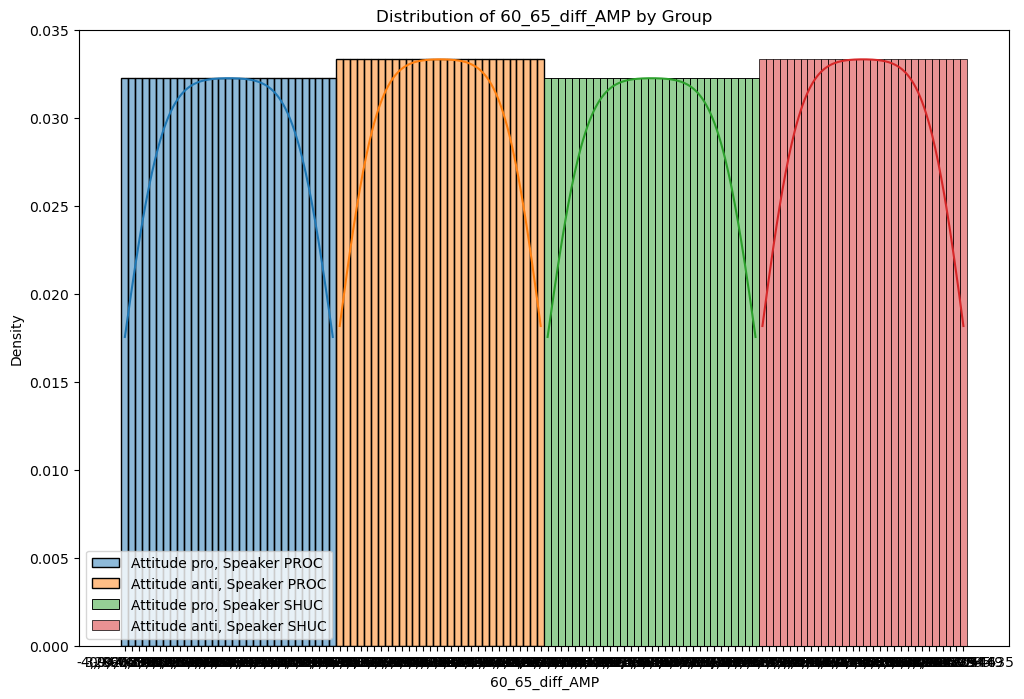

In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
data = pd.read_csv('01.csv')

# Замена запятых на точки в столбце 60_65_diff_AMP
data['60_65_diff_AMP'] = data['60_65_diff_AMP'].astype(str).str.replace(',', '.', regex=False).astype(float)

# Определение групп
groups = {
    'Attitude pro, Speaker PROC': data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'PROC')],
    'Attitude anti, Speaker PROC': data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'PROC')],
    'Attitude pro, Speaker SHUC': data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'SHUC')],
    'Attitude anti, Speaker SHUC': data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'SHUC')]
}

# Проверка нормальности распределения
results = {}
for group_name, group_data in groups.items():
    stat, p_value = stats.shapiro(group_data['60_65_diff_AMP'])
    results[group_name] = (stat, p_value)

# Вывод результатов
for group_name, (stat, p_value) in results.items():
    print(f"{group_name}: Statistic={stat:.3f}, p-value={p_value:.3f}")

# Визуализация распределений
plt.figure(figsize=(12, 8))
for group_name, group_data in groups.items():
    sns.histplot(group_data['50_75_diff_AMP'], kde=True, label=group_name, stat="density", bins=30)
    
plt.title('Distribution of 60_65_diff_AMP by Group')
plt.xlabel('60_65_diff_AMP')
plt.ylabel('Density')
plt.legend()
plt.show()

In [17]:
import pandas as pd
from scipy import stats

# Загрузка данных из CSV файла
data = pd.read_csv('01.csv')

data['60_65_diff_AMP'] = data['60_65_diff_AMP'].astype(str).str.replace(',', '.', regex=False).astype(float)


# Фильтрация данных по группам
pro_proc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'PROC')]['60_65_diff_AMP']
anti_proc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'PROC')]['60_65_diff_AMP']

pro_shuc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'SHUC')]['60_65_diff_AMP']
anti_shuc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'SHUC')]['60_65_diff_AMP']

# Проведение t-тестов
t_test_proc = stats.ttest_ind(pro_proc, anti_proc)
t_test_shuc = stats.ttest_ind(pro_shuc, anti_shuc)

# Вывод результатов
print("T-test results for PROC:")
print(f"T-statistic: {t_test_proc.statistic}, P-value: {t_test_proc.pvalue}")

print("\nT-test results for SHUC:")
print(f"T-statistic: {t_test_shuc.statistic}, P-value: {t_test_shuc.pvalue}")

T-test results for PROC:
T-statistic: 1.1488424987737764, P-value: 0.25525721500504084

T-test results for SHUC:
T-statistic: -0.3111893312399656, P-value: 0.7567535659913828


In [25]:
import pandas as pd
from scipy import stats

# Загрузка данных из CSV файла
data = pd.read_csv('01.csv')

data['50_75_diff_AMP'] = data['50_75_diff_AMP'].astype(str).str.replace(',', '.', regex=False).astype(float)


# Фильтрация данных по группам
pro_proc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'PROC')]['50_75_diff_AMP']
anti_proc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'PROC')]['50_75_diff_AMP']

pro_shuc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'SHUC')]['50_75_diff_AMP']
anti_shuc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'SHUC')]['50_75_diff_AMP']

# Проведение t-тестов
t_test_proc = stats.ttest_ind(pro_proc, anti_proc)
t_test_shuc = stats.ttest_ind(pro_shuc, anti_shuc)

# Вывод результатов
print("T-test results for PROC:")
print(f"T-statistic: {t_test_proc.statistic}, P-value: {t_test_proc.pvalue}")

print("\nT-test results for SHUC:")
print(f"T-statistic: {t_test_shuc.statistic}, P-value: {t_test_shuc.pvalue}")

T-test results for PROC:
T-statistic: 0.6616038357858497, P-value: 0.5108008548693985

T-test results for SHUC:
T-statistic: -0.9097853784538508, P-value: 0.3666374947540786


In [35]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
data = pd.read_csv('01.csv')

# Замена запятых на точки в столбце 60_65_diff_AMP
data['50_75_AMP_C'] = data['50_75_AMP_C'].astype(str).str.replace(',', '.', regex=False).astype(float)

# Определение групп
groups = {
    'Attitude pro, Speaker PROC': data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'PROC')],
    'Attitude anti, Speaker PROC': data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'PROC')],
    'Attitude pro, Speaker SHUC': data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'SHUC')],
    'Attitude anti, Speaker SHUC': data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'SHUC')]
}

# Проверка нормальности распределения
results = {}
for group_name, group_data in groups.items():
    stat, p_value = stats.shapiro(group_data['50_75_AMP_C'])
    results[group_name] = (stat, p_value)

# Вывод результатов
for group_name, (stat, p_value) in results.items():
    print(f"{group_name}: Statistic={stat:.3f}, p-value={p_value:.3f}")



Attitude pro, Speaker PROC: Statistic=0.960, p-value=0.285
Attitude anti, Speaker PROC: Statistic=0.931, p-value=0.054
Attitude pro, Speaker SHUC: Statistic=0.951, p-value=0.171
Attitude anti, Speaker SHUC: Statistic=0.907, p-value=0.013


In [23]:
import pandas as pd
from scipy import stats

# Загрузка данных из CSV файла
data = pd.read_csv('01.csv')

data['60_65_AMP_E'] = data['60_65_AMP_E'].astype(str).str.replace(',', '.', regex=False).astype(float)
data['60_65_AMP_C'] = data['60_65_AMP_C'].astype(str).str.replace(',', '.', regex=False).astype(float)

# Фильтрация данных по группам
epro_proc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'PROC')]['60_65_AMP_E']
cpro_proc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'PROC')]['60_65_AMP_C']

eanti_proc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'PROC')]['60_65_AMP_E']
canti_proc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'PROC')]['60_65_AMP_C']

epro_shuc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'SHUC')]['60_65_AMP_E']
cpro_shuc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'SHUC')]['60_65_AMP_C']

eanti_shuc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'SHUC')]['60_65_AMP_E']
canti_shuc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'SHUC')]['60_65_AMP_C']

# Проведение t-тестов
lol1 = stats.ttest_ind(epro_proc, cpro_proc)
lol2 = stats.ttest_ind(eanti_proc, canti_proc)
lol3 = stats.mannwhitneyu(epro_shuc, cpro_shuc)
lol4 = stats.mannwhitneyu(eanti_shuc, canti_shuc)

# Вывод результатов
print("T-test results for pro PROC:")
print(f"T-statistic: {lol1.statistic}, P-value: {lol1.pvalue}")

print("T-test results for anti PROC:")
print(f"T-statistic: {lol2.statistic}, P-value: {lol2.pvalue}")

print("u-test results for pro SHUC:")
print(f"T-statistic: {lol3.statistic}, P-value: {lol3.pvalue}")

print("u-test results for anti SHUC:")
print(f"T-statistic: {lol4.statistic}, P-value: {lol4.pvalue}")

T-test results for pro PROC:
T-statistic: -1.643606704618332, P-value: 0.10548804959230668
T-test results for anti PROC:
T-statistic: -2.658058965404036, P-value: 0.010138992023837494
u-test results for pro SHUC:
T-statistic: 414.0, P-value: 0.3527927765695593
u-test results for anti SHUC:
T-statistic: 444.0, P-value: 0.9351919702393391


In [25]:
import pandas as pd
from scipy import stats

# Загрузка данных из CSV файла
data = pd.read_csv('01.csv')

data['50_75_AMP_E'] = data['50_75_AMP_E'].astype(str).str.replace(',', '.', regex=False).astype(float)
data['50_75_AMP_C'] = data['50_75_AMP_C'].astype(str).str.replace(',', '.', regex=False).astype(float)

# Фильтрация данных по группам
epro_proc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'PROC')]['50_75_AMP_E']
cpro_proc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'PROC')]['50_75_AMP_C']

eanti_proc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'PROC')]['50_75_AMP_E']
canti_proc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'PROC')]['50_75_AMP_C']

epro_shuc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'SHUC')]['50_75_AMP_E']
cpro_shuc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'SHUC')]['50_75_AMP_C']

eanti_shuc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'SHUC')]['50_75_AMP_E']
canti_shuc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'SHUC')]['50_75_AMP_C']

# Проведение t-тестов
lol1 = stats.mannwhitneyu(epro_proc, cpro_proc)
lol2 = stats.mannwhitneyu(eanti_proc, canti_proc)
lol3 = stats.mannwhitneyu(epro_shuc, cpro_shuc)
lol4 = stats.mannwhitneyu(eanti_shuc, canti_shuc)

# Вывод результатов
print("U-test results for pro PROC:")
print(f"U-statistic: {lol1.statistic}, P-value: {lol1.pvalue}")

print("U-test results for anti PROC:")
print(f"U-statistic: {lol2.statistic}, P-value: {lol2.pvalue}")

print("U-test results for pro SHUC:")
print(f"U-statistic: {lol3.statistic}, P-value: {lol3.pvalue}")

print("U-test results for anti SHUC:")
print(f"U-statistic: {lol4.statistic}, P-value: {lol4.pvalue}")

T-test results for pro PROC:
T-statistic: 331.0, P-value: 0.03593099539739914
T-test results for anti PROC:
T-statistic: 301.0, P-value: 0.02812866989728732
u-test results for pro SHUC:
T-statistic: 411.0, P-value: 0.3313383886465048
u-test results for anti SHUC:
T-statistic: 471.0, P-value: 0.7618283459354748


In [17]:
import pandas as pd
from scipy import stats

# Загрузка данных из CSV файла
data = pd.read_csv('01.csv')

data['50_75_AMP_C'] = data['50_75_AMP_C'].astype(str).str.replace(',', '.', regex=False).astype(float)


# Фильтрация данных по группам
pro_proc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'PROC')]['50_75_AMP_C']
anti_proc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'PROC')]['50_75_AMP_C']

pro_shuc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'SHUC')]['50_75_AMP_C']
anti_shuc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'SHUC')]['50_75_AMP_C']

# Проведение t-тестов mannwhitneyu
t_test_proc = stats.ttest_ind(pro_proc, anti_proc)
t_test_shuc = stats.mannwhitneyu(pro_shuc, anti_shuc)

# Вывод результатов
print("T-test results for PROC:")
print(f"T-statistic: {t_test_proc.statistic}, P-value: {t_test_proc.pvalue}")

print("\nT-test results for SHUC:")
print(f"T-statistic: {t_test_shuc.statistic}, P-value: {t_test_shuc.pvalue}")

T-test results for PROC:
T-statistic: -0.8352443802768345, P-value: 0.40694974440419585

T-test results for SHUC:
T-statistic: 474.0, P-value: 0.9024055750844743


In [57]:
import pandas as pd
from scipy import stats

# Загрузка данных из CSV файла
data = pd.read_csv('01.csv')

data['50_75_AMP_C'] = data['50_75_AMP_C'].astype(str).str.replace(',', '.', regex=False).astype(float)


# Фильтрация данных по группам
pro_proc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'PROC')]['50_75_AMP_C']
anti_proc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'PROC')]['50_75_AMP_C']

pro_shuc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'SHUC')]['50_75_AMP_C']
anti_shuc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'SHUC')]['50_75_AMP_C']

# Проведение t-тестов
t_test_proc = stats.ttest_ind(pro_proc, anti_proc)
t_test_shuc = stats.mannwhitneyu(pro_shuc, anti_shuc)

# Вывод результатов
print("T-test results for PROC:")
print(f"T-statistic: {t_test_proc.statistic}, P-value: {t_test_proc.pvalue}")

print("\nT-test results for SHUC:")
print(f"T-statistic: {t_test_shuc.statistic}, P-value: {t_test_shuc.pvalue}")

T-test results for PROC:
T-statistic: -0.8352443802768345, P-value: 0.40694974440419585

T-test results for SHUC:
T-statistic: 474.0, P-value: 0.9024055750844743


In [65]:
import pandas as pd
from scipy import stats

# Загрузка данных из CSV файла
data = pd.read_csv('01.csv')

data['50_75_AMP_E'] = data['50_75_AMP_E'].astype(str).str.replace(',', '.', regex=False).astype(float)
data['50_75_AMP_C'] = data['50_75_AMP_C'].astype(str).str.replace(',', '.', regex=False).astype(float)

# Фильтрация данных по группам
epro_proc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'PROC')]['50_75_AMP_E']
cpro_proc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'PROC')]['50_75_AMP_C']

eanti_proc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'PROC')]['50_75_AMP_E']
canti_proc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'PROC')]['50_75_AMP_C']

epro_shuc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'SHUC')]['50_75_AMP_E']
cpro_shuc = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'SHUC')]['50_75_AMP_C']

eanti_shuc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'SHUC')]['50_75_AMP_E']
canti_shuc = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'SHUC')]['50_75_AMP_C']

# Проведение t-тестов
lol1 = stats.mannwhitneyu(epro_proc, cpro_proc)
lol2 = stats.mannwhitneyu(eanti_proc, canti_proc)
lol3 = stats.mannwhitneyu(epro_shuc, cpro_shuc)
lol4 = stats.mannwhitneyu(eanti_shuc, canti_shuc)

# Вывод результатов
print("T-test results for pro PROC:")
print(f"T-statistic: {lol1.statistic}, P-value: {lol1.pvalue}")

print("T-test results for anti PROC:")
print(f"T-statistic: {lol2.statistic}, P-value: {lol2.pvalue}")

print("u-test results for pro SHUC:")
print(f"T-statistic: {lol3.statistic}, P-value: {lol3.pvalue}")

print("u-test results for anti SHUC:")
print(f"T-statistic: {lol4.statistic}, P-value: {lol4.pvalue}")

T-test results for pro PROC:
T-statistic: 331.0, P-value: 0.03593099539739914
T-test results for anti PROC:
T-statistic: 301.0, P-value: 0.02812866989728732
u-test results for pro SHUC:
T-statistic: 411.0, P-value: 0.3313383886465048
u-test results for anti SHUC:
T-statistic: 471.0, P-value: 0.7618283459354748


In [81]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Загрузка данных
data = pd.read_csv('01.csv')

# Замена запятых на точки в числовых переменных
data = data.replace(',', '.', regex=True)

# Преобразование строковых значений в числовые
data[['60_65_AMP_E', '60_65_AMP_C', '60_65_diff_AMP', '50_75_AMP_E', '50_75_AMP_C', '50_75_diff_AMP']] = data[['60_65_AMP_E', '60_65_AMP_C', '60_65_diff_AMP', '50_75_AMP_E', '50_75_AMP_C', '50_75_diff_AMP']].apply(pd.to_numeric)

# Список переменных для регрессии
variables = ['60_65_AMP_E', '60_65_AMP_C', '60_65_diff_AMP', '50_75_AMP_E', '50_75_AMP_C', '50_75_diff_AMP']
results = []

# Логистическая регрессия для каждой переменной
for var in variables:
    # Определение зависимой и независимой переменной
    X = data[[var]]
    y = data['Attitude'].map({'anti': 0, 'pro': 1})  # Преобразование категориальной переменной в числовую
    
    # Добавление константы для модели
    X = sm.add_constant(X)
    
    # Построение модели
    model = sm.Logit(y, X)
    result = model.fit(disp=0)  # disp=0 отключает вывод информации о процессе
    
    # Сохранение результатов
    results.append({
        'Variable': var,
        'Coefficient': result.params[var],
        'P-Value': result.pvalues[var],
        'Odds Ratio': round(np.exp(result.params[var]), 4),  # Рассчитываем Odds Ratio
        'Confidence Interval (Lower)': round(result.conf_int().loc[var][0], 4),
        'Confidence Interval (Upper)': round(result.conf_int().loc[var][1], 4),
    })

# Создание DataFrame с результатами
results_df = pd.DataFrame(results)

# Сохранение результатов в Excel
results_df.to_excel('logistic_regression_results.xlsx', index=False)

print("Результаты логистической регрессии сохранены в файл 'logistic_regression_results.xlsx'.")

Результаты логистической регрессии сохранены в файл 'logistic_regression_results.xlsx'.


In [87]:
import pandas as pd
import numpy as np
from scipy import stats

# Загрузка данных из CSV файла
data = pd.read_csv('01.csv')

# Замена запятых на точки в строковых данных
data = data.replace(',', '.', regex=True)

# Преобразование всех столбцов в числовой формат
data = data.apply(pd.to_numeric, errors='coerce')

# Выбор нужных переменных
variables = [
    'CRT', 'NFCS', 'CS', '60_65_AMP_E', '60_65_AMP_C',
    '60_65_diff_AMP', '50_75_AMP_E', '50_75_AMP_C',
    '50_75_diff_AMP', 'Persuasiveness', 'Sharing',
    'Congruence', 'Authoritativeness', 'Trust'
]

# Выбор только нужных переменных
data_subset = data[variables]

# Вычисление корреляционной матрицы
correlation_matrix = data_subset.corr().round(2)  # Округление до 2 знаков после запятой

# Функция для определения уровня значимости
def significance_stars(p_value):
    if p_value < 0.001:
        return "***"  # Высокая значимость
    elif p_value < 0.01:
        return "**"   # Средняя значимость
    elif p_value < 0.05:
        return "*"    # Низкая значимость
    else:
        return ""     # Нет значимости

# Создание матрицы p-значений
p_values = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

for i in range(len(variables)):
    for j in range(len(variables)):
        if i != j:
            _, p_values.iloc[i, j] = stats.pearsonr(data_subset[variables[i]].dropna(), data_subset[variables[j]].dropna())

# Создание матрицы с корреляциями и звёздочками
correlation_with_stars = correlation_matrix.astype(str)

for i in range(len(variables)):
    for j in range(len(variables)):
        if i != j:
            star = significance_stars(p_values.iloc[i, j])
            correlation_with_stars.iloc[i, j] += star

# Вывод итоговой матрицы
print(correlation_with_stars)

# (Опционально) Сохранение в CSV файл
correlation_with_stars.to_csv('correlation_matrix_with_stars.csv')

                      CRT     NFCS       CS 60_65_AMP_E 60_65_AMP_C  \
CRT                   1.0    -0.03   0.26**        0.02       -0.14   
NFCS                -0.03      1.0   -0.22*       -0.06       -0.07   
CS                 0.26**   -0.22*      1.0       -0.14       -0.02   
60_65_AMP_E          0.02    -0.06    -0.14         1.0        0.06   
60_65_AMP_C         -0.14    -0.07    -0.02        0.06         1.0   
60_65_diff_AMP       0.12     0.01    -0.09     0.67***     -0.7***   
50_75_AMP_E         -0.04    -0.18  -0.24**     0.75***         0.1   
50_75_AMP_C         -0.06     0.02    -0.06        0.05     0.78***   
50_75_diff_AMP       0.02    -0.14    -0.12     0.49***    -0.53***   
Persuasiveness      -0.17    -0.13     0.01       -0.12       -0.06   
Sharing             -0.14    -0.11     0.07       -0.07        0.03   
Congruence           -0.1    -0.13     0.04       -0.13       -0.09   
Authoritativeness   -0.09    -0.09     0.02        -0.1       -0.03   
Trust 

In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM

# Загрузка данных
data = pd.read_csv('01.csv')

# Замена запятых на точки в числовых переменных
data = data.replace(',', '.', regex=True)

# Преобразование строковых значений в числовые
data[['60_65_AMP_E', '60_65_AMP_C', '60_65_diff_AMP', '50_75_AMP_E', '50_75_AMP_C', '50_75_diff_AMP']] = data[['60_65_AMP_E', '60_65_AMP_C', '60_65_diff_AMP', '50_75_AMP_E', '50_75_AMP_C', '50_75_diff_AMP']].apply(pd.to_numeric)

# Список переменных для логистической регрессии
variables = ['60_65_AMP_E', '60_65_AMP_C', '60_65_diff_AMP', '50_75_AMP_E', '50_75_AMP_C', '50_75_diff_AMP']
results_logistic = []

# Логистическая регрессия для Attitude
for var in variables:
    X = data[[var]]
    y = data['Attitude'].map({'anti': 0, 'pro': 1})
    X = sm.add_constant(X)
    
    model = sm.Logit(y, X)
    result = model.fit(disp=0)
    
    results_logistic.append({
        'Variable': var,
        'Model': 'Attitude',
        'Coefficient': result.params[var],
        'Intercept': result.params['const'],
        'P-Value': result.pvalues[var],
        'Odds Ratio': round(np.exp(result.params[var]), 4),
        'Confidence Interval (Lower)': round(result.conf_int().loc[var][0], 4),
        'Confidence Interval (Upper)': round(result.conf_int().loc[var][1], 4),
    })

# Логистическая регрессия для Speaker
for var in variables:
    X = data[[var]]
    y = data['Speaker'].map({'PROC': 0, 'SHUC': 1})
    X = sm.add_constant(X)
    
    model = sm.Logit(y, X)
    result = model.fit(disp=0)
    
    results_logistic.append({
        'Variable': var,
        'Model': 'Speaker',
        'Coefficient': result.params[var],
        'Intercept': result.params['const'],
        'P-Value': result.pvalues[var],
        'Odds Ratio': round(np.exp(result.params[var]), 4),
        'Confidence Interval (Lower)': round(result.conf_int().loc[var][0], 4),
        'Confidence Interval (Upper)': round(result.conf_int().loc[var][1], 4),
    })

# Создание DataFrame с результатами логистической регрессии
results_logistic_df = pd.DataFrame(results_logistic)

# Сохранение результатов логистической регрессии в Excel
results_logistic_df.to_excel('logistic1.xlsx', index=False)

# Робастные регрессии для Persuasiveness, Sharing, Congruence, Authoritativeness, Trust, CRT, NFCS, CS
robust_results = []
dependent_vars = ['Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust', 'CRT', 'NFCS', 'CS']

for dep_var in dependent_vars:
    for var in variables:
        X = data[[var]]
        y = data[dep_var]
        X = sm.add_constant(X)
        
        model = RLM(y, X)
        result = model.fit()
        
        robust_results.append({
            'Dependent Variable': dep_var,
            'Independent Variable': var,
            'Coefficient': result.params[var],
            'Intercept': result.params['const'],
            'P-Value': result.pvalues[var] if hasattr(result, 'pvalues') else np.nan,
            'Confidence Interval (Lower)': round(result.conf_int().loc[var][0], 4),
            'Confidence Interval (Upper)': round(result.conf_int().loc[var][1], 4),
        })

# Создание DataFrame с результатами робастной регрессии
robust_results_df = pd.DataFrame(robust_results)

# Сохранение результатов робастной регрессии в Excel
robust_results_df.to_excel('robust1.xlsx', index=False)

print("Результаты логистической регрессии сохранены в файл 'logistic_regression_results.xlsx'.")
print("Результаты робастной регрессии сохранены в файл 'robust_regression_results.xlsx'.")

Результаты логистической регрессии сохранены в файл 'logistic_regression_results.xlsx'.
Результаты робастной регрессии сохранены в файл 'robust_regression_results.xlsx'.


In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM

# Загрузка данных
data = pd.read_csv('01.csv')

# Замена запятых на точки в числовых переменных
data = data.replace(',', '.', regex=True)

# Преобразование строковых значений в числовые
data[['60_65_AMP_E', '60_65_AMP_C', '60_65_diff_AMP', '50_75_AMP_E', '50_75_AMP_C', '50_75_diff_AMP']] = data[['60_65_AMP_E', '60_65_AMP_C', '60_65_diff_AMP', '50_75_AMP_E', '50_75_AMP_C', '50_75_diff_AMP']].apply(pd.to_numeric)

# Список переменных для логистической регрессии
variables = ['60_65_AMP_E', '60_65_AMP_C', '60_65_diff_AMP', '50_75_AMP_E', '50_75_AMP_C', '50_75_diff_AMP']
results_logistic = []

# Логистическая регрессия для Attitude
for var in variables:
    X = data[[var]]
    y = data['Attitude'].map({'anti': 0, 'pro': 1})
    
    X = sm.add_constant(X)
    model = sm.Logit(y, X)
    result = model.fit(disp=0)
    
    results_logistic.append({
        'Variable': var,
        'Coefficient': result.params[var],
        'P-Value': result.pvalues[var],
        'Odds Ratio': round(np.exp(result.params[var]), 4),
        'Confidence Interval (Lower)': round(result.conf_int().loc[var][0], 4),
        'Confidence Interval (Upper)': round(result.conf_int().loc[var][1], 4),
    })

# Логистическая регрессия для Speaker
y_speaker = data['Speaker'].map({'PROC': 0, 'SHUC': 1})  # Преобразование категориальной переменной в числовую
for var in variables:
    X = data[[var]]
    
    X = sm.add_constant(X)
    model = sm.Logit(y_speaker, X)
    result = model.fit(disp=0)
    
    results_logistic.append({
        'Variable': var + '_Speaker',
        'Coefficient': result.params[var],
        'P-Value': result.pvalues[var],
        'Odds Ratio': round(np.exp(result.params[var]), 4),
        'Confidence Interval (Lower)': round(result.conf_int().loc[var][0], 4),
        'Confidence Interval (Upper)': round(result.conf_int().loc[var][1], 4),
    })

# Создание DataFrame с результатами логистической регрессии
results_logistic_df = pd.DataFrame(results_logistic)

# Сохранение результатов логистической регрессии в Excel
results_logistic_df.to_excel('logistic1.xlsx', index=False)

# Робастные регрессии
robust_results = []
dependent_vars = ['Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust', 'CRT', 'NFCS', 'CS']

for dep_var in dependent_vars:
    for var in variables:
        X = data[[var]]
        y = data[dep_var]
        
        X = sm.add_constant(X)
        model = RLM(y, X)
        result = model.fit()
        
        robust_results.append({
            'Dependent Variable': dep_var,
            'Independent Variable': var,
            'Coefficient': result.params[var],
            'P-Value': result.pvalues[var],
            'Confidence Interval (Lower)': round(result.conf_int().loc[var][0], 4),
            'Confidence Interval (Upper)': round(result.conf_int().loc[var][1], 4),
        })

# Создание DataFrame с результатами робастной регрессии
robust_results_df = pd.DataFrame(robust_results)

# Сохранение результатов робастной регрессии в Excel
robust_results_df.to_excel('robust1.xlsx', index=False)

print("Результаты логистической регрессии сохранены в файл 'logistic_regression_results.xlsx'.")
print("Результаты робастной регрессии сохранены в файл 'robust_regression_results.xlsx'.")

Результаты логистической регрессии сохранены в файл 'logistic_regression_results.xlsx'.
Результаты робастной регрессии сохранены в файл 'robust_regression_results.xlsx'.


In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM

# Загрузка данных
data = pd.read_csv('01.csv')

# Замена запятых на точки в числовых переменных
data = data.replace(',', '.', regex=True)

# Преобразование строковых значений в числовые
data[['60_65_AMP_E', '60_65_AMP_C', '60_65_diff_AMP', '50_75_AMP_E', '50_75_AMP_C', '50_75_diff_AMP']] = data[['60_65_AMP_E', '60_65_AMP_C', '60_65_diff_AMP', '50_75_AMP_E', '50_75_AMP_C', '50_75_diff_AMP']].apply(pd.to_numeric)

# Список переменных для логистической регрессии
variables = ['60_65_AMP_E', '60_65_AMP_C', '60_65_diff_AMP', '50_75_AMP_E', '50_75_AMP_C', '50_75_diff_AMP']
results_logistic = []

# Логистическая регрессия для Attitude
for var in variables:
    X = data[[var]]
    y = data['Attitude'].map({'anti': 0, 'pro': 1})
    
    X = sm.add_constant(X)
    model = sm.Logit(y, X)
    result = model.fit(disp=0)
    
    # Формула логистической регрессии
    formula = f"Attitude = {round(result.params[0], 4)} + {round(result.params[var], 4)} * {var}"
    
    results_logistic.append({
        'Variable': var,
        'Coefficient': result.params[var],
        'P-Value': result.pvalues[var],
        'Odds Ratio': round(np.exp(result.params[var]), 4),
        'Confidence Interval (Lower)': round(result.conf_int().loc[var][0], 4),
        'Confidence Interval (Upper)': round(result.conf_int().loc[var][1], 4),
        'Formula': formula
    })

# Логистическая регрессия для Speaker
y_speaker = data['Speaker'].map({'PROC': 0, 'SHUC': 1})  # Преобразование категориальной переменной в числовую
for var in variables:
    X = data[[var]]
    
    X = sm.add_constant(X)
    model = sm.Logit(y_speaker, X)
    result = model.fit(disp=0)
    
    # Формула логистической регрессии для Speaker
    formula = f"Speaker = {round(result.params[0], 4)} + {round(result.params[var], 4)} * {var}"
    
    results_logistic.append({
        'Variable': var + '_Speaker',
        'Coefficient': result.params[var],
        'P-Value': result.pvalues[var],
        'Odds Ratio': round(np.exp(result.params[var]), 4),
        'Confidence Interval (Lower)': round(result.conf_int().loc[var][0], 4),
        'Confidence Interval (Upper)': round(result.conf_int().loc[var][1], 4),
        'Formula': formula
    })

# Создание DataFrame с результатами логистической регрессии
results_logistic_df = pd.DataFrame(results_logistic)

# Сохранение результатов логистической регрессии в Excel
results_logistic_df.to_excel('logistic3.xlsx', index=False)

# Робастные регрессии
robust_results = []
dependent_vars = ['Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust', 'CRT', 'NFCS', 'CS', 'Factor 1', 'Factor 2']

for dep_var in dependent_vars:
    for var in variables:
        X = data[[var]]
        y = data[dep_var]
        
        X = sm.add_constant(X)
        model = RLM(y, X)
        result = model.fit()
        
        # Формула робастной регрессии
        formula = f"{dep_var} = {round(result.params[0], 4)} + {round(result.params[var], 4)} * {var}"
        
        robust_results.append({
            'Dependent Variable': dep_var,
            'Independent Variable': var,
            'Coefficient': result.params[var],
            'P-Value': result.pvalues[var],
            'Confidence Interval (Lower)': round(result.conf_int().loc[var][0], 4),
            'Confidence Interval (Upper)': round(result.conf_int().loc[var][1], 4),
            'Formula': formula
        })

# Создание DataFrame с результатами робастной регрессии
robust_results_df = pd.DataFrame(robust_results)

# Сохранение результатов робастной регрессии в Excel
robust_results_df.to_excel('robust3.xlsx', index=False)

print("Результаты логистической регрессии сохранены в файл 'logistic_regression_results.xlsx'.")

/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_65759/2231172313.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  formula = f"Attitude = {round(result.params[0], 4)} + {round(result.params[var], 4)} * {var}"
/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_65759/2231172313.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  formula = f"Attitude = {round(result.params[0], 4)} + {round(result.params[var], 4)} * {var}"
/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_65759/2231172313.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version

Результаты логистической регрессии сохранены в файл 'logistic_regression_results.xlsx'.


In [15]:
import pandas as pd

# Данные для таблицы
data = [
    ["Pro-vaccination Group", "Speaker X", 3.55, 2.10, 3.00, 4.26, 1.77, 5.00, 3.84, 2.18, 3.00, 4.42, 1.48, 5.00, 4.35, 2.09, 5.00],
    ["Pro-vaccination Group", "Speaker Y", 1.61, 0.88, 1.00, 3.42, 1.95, 4.00, 2.52, 1.79, 2.00, 3.74, 1.63, 4.00, 3.68, 2.01, 4.00],
    ["Pro-vaccination Group", "Speaker X", 3.43, 1.85, 4.00, 4.20, 2.23, 5.00, 3.47, 2.13, 3.50, 4.10, 1.83, 5.00, 5.03, 2.17, 5.50],
    ["Pro-vaccination Group", "Speaker Y", 1.90, 1.17, 1.00, 2.40, 1.54, 2.00, 2.40, 1.50, 2.00, 2.90, 1.29, 3.00, 4.85, 1.87, 5.00],
]



# Названия колонок
columns = [
    "Experimental groups", "Speaker", 
    "Authoritativeness (Mean)", "SD", "Median",
    "Persuasiveness (Mean)", "SD", "Median",
    "Sharing intentions (Mean)", "SD", "Median",
    "Congruence to internal attitudes (Mean)", "SD", "Median",
    "Trust (Mean)", "SD", "Median"
]

# Создаем DataFrame
df = pd.DataFrame(data, columns=columns)

# Сохраняем таблицу в Excel
output_file = "ratings_table.xlsx"
df.to_excel(output_file, index=False, sheet_name="Ratings Table")

print(f"Таблица успешно сохранена в файл '{output_file}'!")


Таблица успешно сохранена в файл 'ratings_table.xlsx'!


In [ ]:

Variable: CRT, Group: All, Shapiro-Wilk Statistic: 0.906, p-value: 0.0
Variable: NFCS, Group: All, Shapiro-Wilk Statistic: 0.941, p-value: 0.0
Variable: CS, Group: All, Shapiro-Wilk Statistic: 0.986, p-value: 0.251

Variable: Persuasiveness, Group: All, Shapiro-Wilk Statistic: 0.89, p-value: 0.0
Variable: Sharing, Group: All, Shapiro-Wilk Statistic: 0.858, p-value: 0.0
Variable: Congruence, Group: All, Shapiro-Wilk Statistic: 0.948, p-value: 0.0
Variable: Authoritativeness, Group: All, Shapiro-Wilk Statistic: 0.842, p-value: 0.0
Variable: Trust, Group: All, Shapiro-Wilk Statistic: 0.889, p-value: 0.0

Variable: CRT, Group: Attitude: pro, Shapiro-Wilk Statistic: 0.916, p-value: 0.0
Variable: CRT, Group: Attitude: anti, Shapiro-Wilk Statistic: 0.884, p-value: 0.0
Variable: NFCS, Group: Attitude: pro, Shapiro-Wilk Statistic: 0.917, p-value: 0.0
Variable: NFCS, Group: Attitude: anti, Shapiro-Wilk Statistic: 0.94, p-value: 0.005
Variable: CS, Group: Attitude: pro, Shapiro-Wilk Statistic: 0.959, p-value: 0.037
Variable: CS, Group: Attitude: anti, Shapiro-Wilk Statistic: 0.963, p-value: 0.063


Variable: Persuasiveness, Group: Attitude: pro, Shapiro-Wilk Statistic: 0.897, p-value: 0.0
Variable: Persuasiveness, Group: Attitude: anti, Shapiro-Wilk Statistic: 0.87, p-value: 0.0
Variable: Sharing, Group: Attitude: pro, Shapiro-Wilk Statistic: 0.858, p-value: 0.0
Variable: Sharing, Group: Attitude: anti, Shapiro-Wilk Statistic: 0.849, p-value: 0.0
Variable: Congruence, Group: Attitude: pro, Shapiro-Wilk Statistic: 0.95, p-value: 0.013
Variable: Congruence, Group: Attitude: anti, Shapiro-Wilk Statistic: 0.941, p-value: 0.006
Variable: Authoritativeness, Group: Attitude: pro, Shapiro-Wilk Statistic: 0.788, p-value: 0.0
Variable: Authoritativeness, Group: Attitude: anti, Shapiro-Wilk Statistic: 0.864, p-value: 0.0
Variable: Trust, Group: Attitude: pro, Shapiro-Wilk Statistic: 0.906, p-value: 0.0
Variable: Trust, Group: Attitude: anti, Shapiro-Wilk Statistic: 0.867, p-value: 0.0


Variable: CRT, Group: Speaker: PROC, Shapiro-Wilk Statistic: 0.907, p-value: 0.0
Variable: CRT, Group: Speaker: SHUC, Shapiro-Wilk Statistic: 0.907, p-value: 0.0
Variable: NFCS, Group: Speaker: PROC, Shapiro-Wilk Statistic: 0.943, p-value: 0.007
Variable: NFCS, Group: Speaker: SHUC, Shapiro-Wilk Statistic: 0.943, p-value: 0.007
Variable: CS, Group: Speaker: PROC, Shapiro-Wilk Statistic: 0.989, p-value: 0.846
Variable: CS, Group: Speaker: SHUC, Shapiro-Wilk Statistic: 0.989, p-value: 0.846

Variable: Persuasiveness, Group: Speaker: PROC, Shapiro-Wilk Statistic: 0.907, p-value: 0.0
Variable: Persuasiveness, Group: Speaker: SHUC, Shapiro-Wilk Statistic: 0.819, p-value: 0.0
Variable: Sharing, Group: Speaker: PROC, Shapiro-Wilk Statistic: 0.906, p-value: 0.0
Variable: Sharing, Group: Speaker: SHUC, Shapiro-Wilk Statistic: 0.758, p-value: 0.0
Variable: Congruence, Group: Speaker: PROC, Shapiro-Wilk Statistic: 0.94, p-value: 0.005
Variable: Congruence, Group: Speaker: SHUC, Shapiro-Wilk Statistic: 0.939, p-value: 0.005
Variable: Authoritativeness, Group: Speaker: PROC, Shapiro-Wilk Statistic: 0.931, p-value: 0.002
Variable: Authoritativeness, Group: Speaker: SHUC, Shapiro-Wilk Statistic: 0.687, p-value: 0.0
Variable: Trust, Group: Speaker: PROC, Shapiro-Wilk Statistic: 0.878, p-value: 0.0
Variable: Trust, Group: Speaker: SHUC, Shapiro-Wilk Statistic: 0.877, p-value: 0.0

In [19]:
import pandas as pd

# Создаём DataFrame с вашими данными
data = [
    {"Variable": "CRT", "Group": "All", "Shapiro-Wilk Statistic": 0.906, "p-value": 0.0},
    {"Variable": "NFCS", "Group": "All", "Shapiro-Wilk Statistic": 0.941, "p-value": 0.0},
    {"Variable": "CS", "Group": "All", "Shapiro-Wilk Statistic": 0.986, "p-value": 0.251},
    {"Variable": "Persuasiveness", "Group": "All", "Shapiro-Wilk Statistic": 0.885, "p-value": 0.0},
    {"Variable": "Sharing", "Group": "All", "Shapiro-Wilk Statistic": 0.864, "p-value": 0.0},
    {"Variable": "Congruence", "Group": "All", "Shapiro-Wilk Statistic": 0.942, "p-value": 0.0},
    {"Variable": "Authoritativeness", "Group": "All", "Shapiro-Wilk Statistic": 0.84, "p-value": 0.0},
    {"Variable": "Trust", "Group": "All", "Shapiro-Wilk Statistic": 0.892, "p-value": 0.0},
    {"Variable": "CRT", "Group": "Attitude: pro", "Shapiro-Wilk Statistic": 0.916, "p-value": 0.0},
    {"Variable": "CRT", "Group": "Attitude: anti", "Shapiro-Wilk Statistic": 0.884, "p-value": 0.0},
    {"Variable": "NFCS", "Group": "Attitude: pro", "Shapiro-Wilk Statistic": 0.917, "p-value": 0.0},
    {"Variable": "NFCS", "Group": "Attitude: anti", "Shapiro-Wilk Statistic": 0.94, "p-value": 0.005},
    {"Variable": "CS", "Group": "Attitude: pro", "Shapiro-Wilk Statistic": 0.959, "p-value": 0.037},
    {"Variable": "CS", "Group": "Attitude: anti", "Shapiro-Wilk Statistic": 0.963, "p-value": 0.063},
    {"Variable": "Persuasiveness", "Group": "Attitude: pro", "Shapiro-Wilk Statistic": 0.885, "p-value": 0.0},
    {"Variable": "Persuasiveness", "Group": "Attitude: anti", "Shapiro-Wilk Statistic": 0.868, "p-value": 0.0},
    {"Variable": "Sharing", "Group": "Attitude: pro", "Shapiro-Wilk Statistic": 0.854, "p-value": 0.0},
    {"Variable": "Sharing", "Group": "Attitude: anti", "Shapiro-Wilk Statistic": 0.869, "p-value": 0.0},
    {"Variable": "Congruence", "Group": "Attitude: pro", "Shapiro-Wilk Statistic": 0.95, "p-value": 0.014},
    {"Variable": "Congruence", "Group": "Attitude: anti", "Shapiro-Wilk Statistic": 0.92, "p-value": 0.002},
    {"Variable": "Authoritativeness", "Group": "Attitude: pro", "Shapiro-Wilk Statistic": 0.798, "p-value": 0.0},
    {"Variable": "Authoritativeness", "Group": "Attitude: anti", "Shapiro-Wilk Statistic": 0.863, "p-value": 0.0},
    {"Variable": "Trust", "Group": "Attitude: pro", "Shapiro-Wilk Statistic": 0.908, "p-value": 0.0},
    {"Variable": "Trust", "Group": "Attitude: anti", "Shapiro-Wilk Statistic": 0.853, "p-value": 0.0},
    {"Variable": "CRT", "Group": "Speaker: PROC", "Shapiro-Wilk Statistic": 0.907, "p-value": 0.0},
    {"Variable": "CRT", "Group": "Speaker: SHUC", "Shapiro-Wilk Statistic": 0.907, "p-value": 0.0},
    {"Variable": "NFCS", "Group": "Speaker: PROC", "Shapiro-Wilk Statistic": 0.943, "p-value": 0.007},
    {"Variable": "NFCS", "Group": "Speaker: SHUC", "Shapiro-Wilk Statistic": 0.943, "p-value": 0.007},
    {"Variable": "CS", "Group": "Speaker: PROC", "Shapiro-Wilk Statistic": 0.989, "p-value": 0.846},
    {"Variable": "CS", "Group": "Speaker: SHUC", "Shapiro-Wilk Statistic": 0.989, "p-value": 0.846},
    {"Variable": "Persuasiveness", "Group": "Speaker: PROC", "Shapiro-Wilk Statistic": 0.896, "p-value": 0.0},
    {"Variable": "Persuasiveness", "Group": "Speaker: SHUC", "Shapiro-Wilk Statistic": 0.831, "p-value": 0.0},
    {"Variable": "Sharing", "Group": "Speaker: PROC", "Shapiro-Wilk Statistic": 0.889, "p-value": 0.0},
    {"Variable": "Sharing", "Group": "Speaker: SHUC", "Shapiro-Wilk Statistic": 0.819, "p-value": 0.0},
    {"Variable": "Congruence", "Group": "Speaker: PROC", "Shapiro-Wilk Statistic": 0.925, "p-value": 0.001},
    {"Variable": "Congruence", "Group": "Speaker: SHUC", "Shapiro-Wilk Statistic": 0.94, "p-value": 0.012},
    {"Variable": "Authoritativeness", "Group": "Speaker: PROC", "Shapiro-Wilk Statistic": 0.912, "p-value": 0.0},
    {"Variable": "Authoritativeness", "Group": "Speaker: SHUC", "Shapiro-Wilk Statistic": 0.724, "p-value": 0.0},
    {"Variable": "Trust", "Group": "Speaker: PROC", "Shapiro-Wilk Statistic": 0.861, "p-value": 0.0},
    {"Variable": "Trust", "Group": "Speaker: SHUC", "Shapiro-Wilk Statistic": 0.91, "p-value": 0.001},
]

# Создание DataFrame
df = pd.DataFrame(data)

# Отображение DataFrame
print(df)

# Пример фильтрации данных: например, только переменные с p-value = 0.0
filtered_df = df[df['p-value'] == 0.0]
print("\nПеременные с p-value = 0.0:")
print(filtered_df)

# Сохранение данных в Excel
df.to_excel("shapiro_wilk_results.xlsx", index=False)
print("\nДанные сохранены в файл 'shapiro_wilk_results.xlsx'")


             Variable           Group  Shapiro-Wilk Statistic  p-value
0                 CRT             All                   0.906    0.000
1                NFCS             All                   0.941    0.000
2                  CS             All                   0.986    0.251
3      Persuasiveness             All                   0.885    0.000
4             Sharing             All                   0.864    0.000
5          Congruence             All                   0.942    0.000
6   Authoritativeness             All                   0.840    0.000
7               Trust             All                   0.892    0.000
8                 CRT   Attitude: pro                   0.916    0.000
9                 CRT  Attitude: anti                   0.884    0.000
10               NFCS   Attitude: pro                   0.917    0.000
11               NFCS  Attitude: anti                   0.940    0.005
12                 CS   Attitude: pro                   0.959    0.037
13    

In [23]:
import pandas as pd

# Data dictionary for the table
data = {
    'Critical Variable': ['Persuasiveness', 'Persuasiveness', 'Persuasiveness', 'Persuasiveness', 'Persuasiveness', 'Persuasiveness',
                          'Sharing', 'Sharing', 'Sharing', 'Sharing', 'Sharing', 'Sharing',
                          'Congruence', 'Congruence', 'Congruence', 'Congruence', 'Congruence', 'Congruence',
                          'Authoritativeness', 'Authoritativeness', 'Authoritativeness', 'Authoritativeness', 'Authoritativeness', 'Authoritativeness',
                          'Trust', 'Trust', 'Trust', 'Trust', 'Trust', 'Trust'],
    'Predictor Variable': ['CRT', 'CRT', 'NFCS', 'NFCS', 'CS', 'CS',
                           'CRT', 'CRT', 'NFCS', 'NFCS', 'CS', 'CS',
                           'CRT', 'CRT', 'NFCS', 'NFCS', 'CS', 'CS',
                           'CRT', 'CRT', 'NFCS', 'NFCS', 'CS', 'CS',
                           'CRT', 'CRT', 'NFCS', 'NFCS', 'CS', 'CS'],
    'Coefficient': [3.593210, 0.032947, 5.086563, -0.021894, 3.811392, 0.009991,
                    3.279964, -0.029630, 4.367586, -0.018998, 3.199286, 0.002761,
                    3.676010, 0.059495, 5.152180, -0.019765, 4.011326, 0.011350,
                    2.820451, -0.038793, 3.896273, -0.019742, 2.771586, 0.010645,
                    3.392965, 0.110492, 6.556870, -0.043861, 3.886291, 0.009273],
    'P-Value': [3.578795e-24, 6.926388e-01, 4.568564e-07, 1.643231e-01, 1.591387e-58, 5.116395e-01,
                2.642101e-19, 7.301698e-01, 2.513094e-05, 2.403395e-01, 2.665157e-39, 8.605508e-01,
                3.028269e-32, 4.161050e-01, 4.479227e-09, 1.494722e-01, 6.349427e-86, 3.882756e-01,
                3.056119e-16, 6.328743e-01, 2.217464e-05, 1.685585e-01, 3.104411e-34, 4.670258e-01,
                2.169089e-19, 2.126470e-01, 2.261991e-10, 6.571345e-03, 2.748987e-53, 5.692891e-01]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert P-Values to numeric format (they are already numeric, but we'll ensure formatting)
df['P-Value'] = df['P-Value'].apply(lambda x: f'{x:.6e}')  # Format as scientific notation with 6 decimal places

# Display the DataFrame
print(df)


    Critical Variable Predictor Variable  Coefficient       P-Value
0      Persuasiveness                CRT     3.593210  3.578795e-24
1      Persuasiveness                CRT     0.032947  6.926388e-01
2      Persuasiveness               NFCS     5.086563  4.568564e-07
3      Persuasiveness               NFCS    -0.021894  1.643231e-01
4      Persuasiveness                 CS     3.811392  1.591387e-58
5      Persuasiveness                 CS     0.009991  5.116395e-01
6             Sharing                CRT     3.279964  2.642101e-19
7             Sharing                CRT    -0.029630  7.301698e-01
8             Sharing               NFCS     4.367586  2.513094e-05
9             Sharing               NFCS    -0.018998  2.403395e-01
10            Sharing                 CS     3.199286  2.665157e-39
11            Sharing                 CS     0.002761  8.605508e-01
12         Congruence                CRT     3.676010  3.028269e-32
13         Congruence                CRT     0.0